In [2]:
from src.extractTransform import requestTaxaJuros

# Baixa os dados da API do Banco Central
df = requestTaxaJuros("2022-01-01", "2025-05-25")


In [5]:
# IMPORTAÇÕES
import pandas as pd
import matplotlib.pyplot as plt
from src.extractTransform import requestTaxaJuros

# BAIXA OS DADOS
df = requestTaxaJuros("2022-01-01", "2025-05-25")

# TRATA DATAS
df['InicioPeriodo'] = pd.to_datetime(df['InicioPeriodo'])
df['FimPeriodo'] = pd.to_datetime(df['FimPeriodo'])
df['Ano'] = df['InicioPeriodo'].dt.year
df['Mes'] = df['InicioPeriodo'].dt.month
df['AnoMes'] = df['InicioPeriodo'].dt.to_period('M')

# VISUALIZA COLUNAS E TIPOS
print(df.columns)
print(df.dtypes)
print(df.sample(3).T)


In [3]:
# Ver o nome de todas as colunas
print(df.columns.tolist())

# Ver 5 linhas aleatórias, transpostas (colunas na vertical)
df.sample(5).T

# Ver os tipos das colunas
df.dtypes


['InicioPeriodo', 'FimPeriodo', 'codigoSegmento', 'Segmento', 'codigoModalidade', 'Modalidade', 'Posicao', 'InstituicaoFinanceira', 'TaxaJurosAoMes', 'TaxaJurosAoAno', 'cnpj8']


InicioPeriodo             object
FimPeriodo                object
codigoSegmento            object
Segmento                  object
codigoModalidade          object
Modalidade                object
Posicao                    int64
InstituicaoFinanceira     object
TaxaJurosAoMes           float64
TaxaJurosAoAno           float64
cnpj8                     object
dtype: object

    AnoMes  TaxaJurosAoMes  TaxaJurosAoAno
0  2022-01        4.195035       94.675514
1  2022-02        4.168835       86.113972
2  2022-03        4.160820       86.243610
3  2022-04        4.246718       90.043877
4  2022-05        4.274580       88.668259


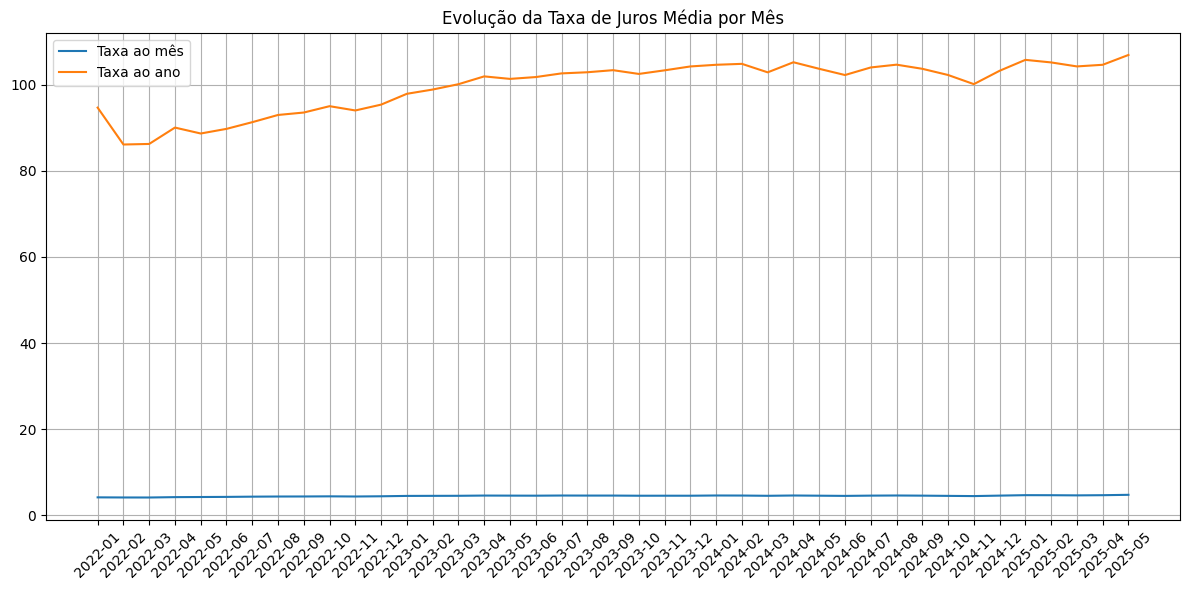

In [6]:
# Agrupa por Ano e Mês
juros_mensal = df.groupby('AnoMes')[['TaxaJurosAoMes', 'TaxaJurosAoAno']].mean().reset_index()

# Exibe os dados
print(juros_mensal.head())

# (Opcional) Gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(juros_mensal['AnoMes'].astype(str), juros_mensal['TaxaJurosAoMes'], label='Taxa ao mês')
plt.plot(juros_mensal['AnoMes'].astype(str), juros_mensal['TaxaJurosAoAno'], label='Taxa ao ano')
plt.xticks(rotation=45)
plt.legend()
plt.title('Evolução da Taxa de Juros Média por Mês')
plt.grid()
plt.tight_layout()
plt.show()
